<a href="https://colab.research.google.com/github/flpsantos3/covid_pt/blob/main/casos_covid_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

**Sources:**

* vax - https://www.kaggle.com/komalkhetlani/coronavirus-covid19-vaccinations
* vax2 - https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea
* cases - https://www.kaggle.com/hussainaliarif/largest-covid19-world-dataset
* cases_2 - https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country
* hosp - https://www.ecdc.europa.eu/en/publications-data/download-data-hospital-and-icu-admission-rates-and-current-occupancy-covid-19
* vars - https://www.ecdc.europa.eu/en/publications-data/data-virus-variants-covid-19-eueea

In [3]:
vax=pd.read_csv('/content/drive/MyDrive/Datasets/world_vax.csv')
vax2=pd.read_csv('https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv')
cases=pd.read_csv('/content/drive/MyDrive/Datasets/Covid-19-World-Dataset.csv')
vars=pd.read_csv('https://opendata.ecdc.europa.eu/covid19/virusvariant/csv/data.csv')
hosp=pd.read_csv('https://opendata.ecdc.europa.eu/covid19/hospitalicuadmissionrates/csv/data.csv')
cases_2=pd.read_csv('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv')

# Vaccines

In [24]:
vax=vax.drop([0]).reset_index(drop=True)
vax_pt=vax.loc[(vax.location=='Portugal')].sort_values(by='date').reset_index(drop=True)
vax_pt.tail()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
193,Portugal,PRT,2021-07-08,9660794,5953680.0,3994952.0,182003.0,135622,94.74,58.39,39.18,13301.0
194,Portugal,PRT,2021-07-09,NaN,NaN,NaN,NaN,139270,NaN,NaN,NaN,13658.0
195,Portugal,PRT,2021-07-10,NaN,NaN,NaN,NaN,142918,NaN,NaN,NaN,14016.0
196,Portugal,PRT,2021-07-11,NaN,NaN,NaN,NaN,146566,NaN,NaN,NaN,14374.0
197,Portugal,PRT,2021-07-12,10225222,6224944.0,4288001.0,NaN,150215,100.28,61.05,42.05,14732.0


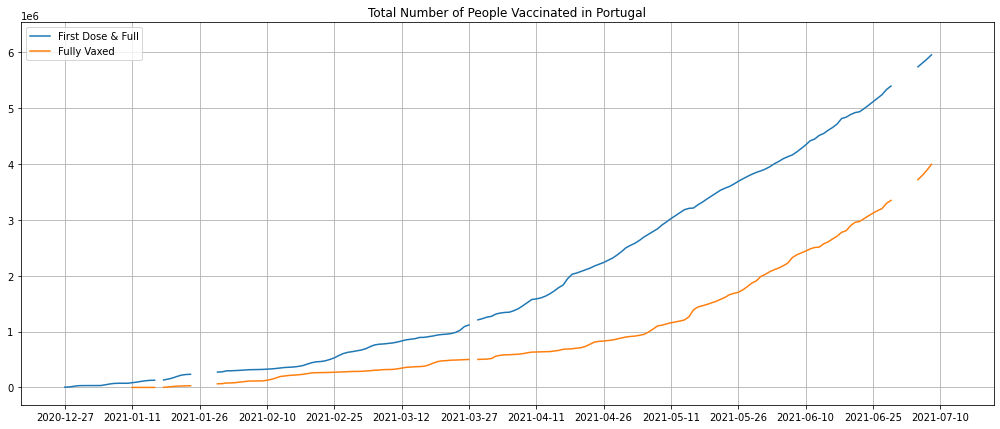

In [25]:
plt.figure(figsize=(14,6))
plt.plot(vax_pt.date, vax_pt.people_vaccinated, label='First Dose & Full')
plt.plot(vax_pt.date, vax_pt.people_fully_vaccinated, label='Fully Vaxed')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(range(0, len(vax_pt.date), 15))
plt.tight_layout()
plt.title('Total Number of People Vaccinated in Portugal')
plt.show()

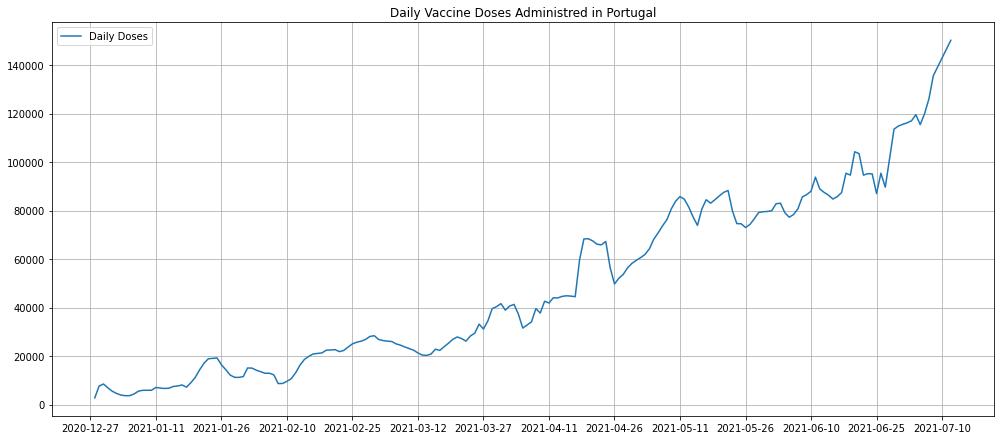

In [6]:
plt.figure(figsize=(14,6))
plt.plot(vax_pt.date, vax_pt.daily_vaccinations, label='Daily Doses')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(range(0, len(vax_pt.date), 15))
plt.tight_layout()
plt.title('Daily Vaccine Doses Administred in Portugal')
plt.show()

In [7]:
vax_pt.daily_vaccinations=vax_pt.daily_vaccinations.astype(float) # daily_vax is object
vax_pt[['date','daily_vaccinations']].loc[vax_pt.daily_vaccinations==vax_pt.daily_vaccinations.max()]

,date,daily_vaccinations
197,2021-07-12,150215.0


# Cases & Deaths

In [8]:
cases_pt=cases[cases.location=='Portugal'].sort_values(by='date').reset_index(drop=True)
cases_pt.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,PRT,Europe,Portugal,1/1/2021,420629.0,6951.0,6972.0,66.0,1.30,483.0,2806.0,NaN,NaN,13937.0,5695754.0,558.588,1.367,0.136,7.3,tests performed,32749.0,32749.0,NaN,0.0,0.32,0.32,NaN,76.85,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN
1,PRT,Europe,Portugal,1/10/2021,483689.0,7502.0,7803.0,102.0,1.36,558.0,3770.0,NaN,803.186,24980.0,6085724.0,596.832,2.450,0.168,6.0,tests performed,74392.0,74392.0,NaN,40.0,0.73,0.73,NaN,75.00,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,36.74
2,PRT,Europe,Portugal,1/11/2021,489293.0,5604.0,7925.0,122.0,1.33,567.0,3983.0,NaN,NaN,47696.0,6133420.0,601.510,4.678,0.170,5.9,tests performed,85875.0,85875.0,15.0,11483.0,0.84,0.84,0.0,63.89,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN


In [9]:
# convert datetime to YYYY-MM-DD format
new_dates=[]
dates=list(cases_pt.date)
for val in dates:
  d=datetime.datetime.strptime(val, '%m/%d/%Y')
  new_dates.append(d.strftime('%Y-%m-%d'))

cases_pt['date']=new_dates
cases_pt.sort_values(by='date', inplace=True)
cases_pt.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
377,PRT,Europe,Portugal,2021-06-25,871483.0,1604.0,17081.0,2.0,NaN,NaN,NaN,NaN,NaN,72004.0,13067445.0,1281.536,7.061,0.022,44.8,tests performed,8014794.0,5240977.0,3120183.0,111386.0,78.60,51.40,30.60,70.37,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN
379,PRT,Europe,Portugal,2021-06-26,873051.0,1568.0,17083.0,2.0,NaN,NaN,NaN,NaN,NaN,48745.0,13116190.0,1286.316,4.780,0.023,43.0,tests performed,8124421.0,5306315.0,3164472.0,109627.0,79.68,52.04,31.03,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN
381,PRT,Europe,Portugal,2021-06-27,874547.0,1496.0,17084.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8222505.0,5367338.0,3201533.0,98084.0,80.64,52.64,31.40,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN
383,PRT,Europe,Portugal,2021-06-28,875449.0,902.0,17086.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8365652.0,5495239.0,3295132.0,143147.0,82.04,53.89,32.32,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN
385,PRT,Europe,Portugal,2021-06-29,877195.0,1746.0,17092.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8480339.0,5557709.0,3347349.0,114687.0,83.17,54.50,32.83,NaN,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,NaN


In [10]:
cases_pt2=cases_2[cases_2.countriesAndTerritories=='Portugal'].reset_index(drop=True)

dates=list(cases_pt2.dateRep)
new_dates=[]
for val in dates:
  d=datetime.datetime.strptime(val, '%d/%m/%Y')
  new_dates.append(d.strftime('%Y-%m-%d'))

cases_pt2['dateRep']=new_dates
cases_pt2=cases_pt2.sort_values(by='dateRep').reset_index(drop=True)
cases_pt2=cases_pt2.rename(columns={'dateRep':'date',
                            'cases':'new_cases',
                            'deaths':'new_deaths'})
cases_pt2.tail(3)

,date,day,month,year,new_cases,new_deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
720,2022-02-15,15,2,2022,18135.0,55.0,Portugal,PT,PRT,10295909,Europe
721,2022-02-16,16,2,2022,20041.0,46.0,Portugal,PT,PRT,10295909,Europe
722,2022-02-17,17,2,2022,16488.0,42.0,Portugal,PT,PRT,10295909,Europe


In [11]:
cases1=cases_pt[['date', 'new_cases','new_deaths']]
cases2=cases_pt2[['date', 'new_cases','new_deaths']]
cases2=cases2[cases2.date>'2021-06-29']

In [12]:
new_cases=pd.concat([cases1, cases2], ignore_index=True)
new_cases.tail(3)

,date,new_cases,new_deaths
723,2022-02-15,18135.0,55.0
724,2022-02-16,20041.0,46.0
725,2022-02-17,16488.0,42.0


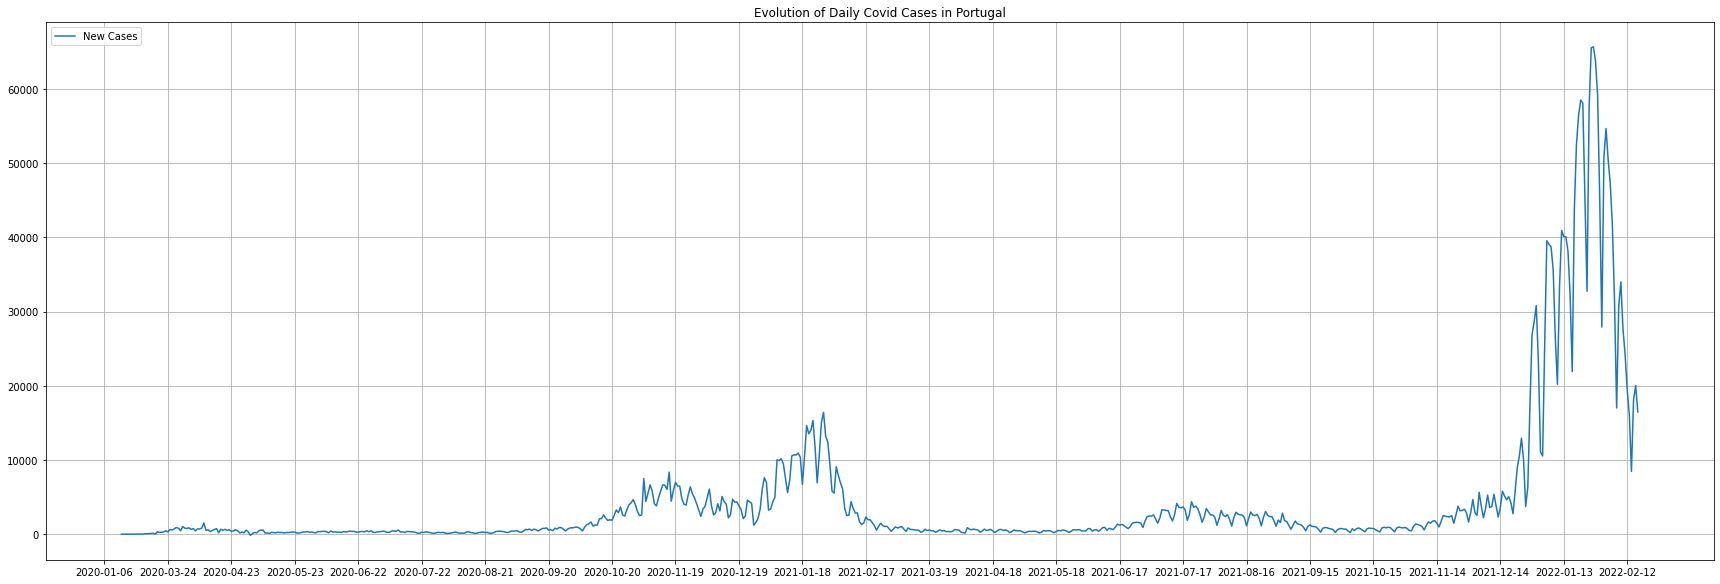

In [26]:
plt.figure(figsize=(24,8))
plt.plot(new_cases.date, new_cases.new_cases, label='New Cases')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(range(0, len(new_cases.date), 30))
plt.tight_layout()
plt.title('Evolution of Daily Covid Cases in Portugal')
plt.show()

In [14]:
new_cases[['date','new_cases']].loc[new_cases.new_cases==new_cases.new_cases.max()]

,date,new_cases
704,2022-01-27,65706.0


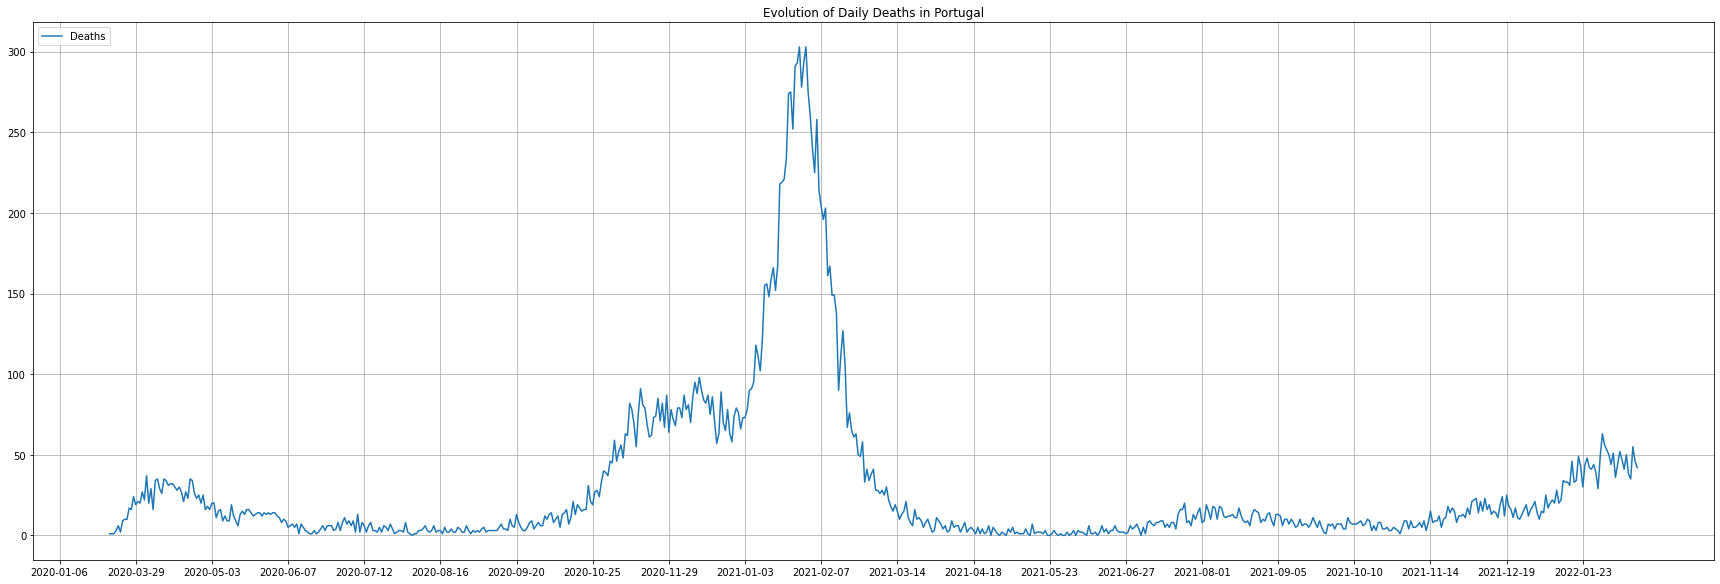

In [27]:
plt.figure(figsize=(24,8))
plt.plot(new_cases.date, new_cases.new_deaths, label='Deaths')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(range(0, len(new_cases.date), 35))
plt.tight_layout()
plt.title('Evolution of Daily Deaths in Portugal')
plt.show()

In [16]:
new_cases[['date','new_deaths']].loc[new_cases.new_deaths==new_cases.new_deaths.max()]

,date,new_deaths
340,2021-01-28,303.0
343,2021-01-31,303.0


# Hospitalizations

In [17]:
hosp_pt=hosp.loc[
                 (hosp.country=='Portugal') & 
                 ((hosp.indicator=='Daily hospital occupancy'))
                 ].sort_values(by='date').reset_index(drop=True)
hosp_pt.head(3)

,country,indicator,date,year_week,value,source,url
0,Portugal,Daily hospital occupancy,2020-02-26,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...
1,Portugal,Daily hospital occupancy,2020-02-27,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...
2,Portugal,Daily hospital occupancy,2020-02-28,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...


In [18]:
icu_pt=hosp.loc[
                 (hosp.country=='Portugal') & 
                 (hosp.indicator=='Daily ICU occupancy')
                 ].sort_values(by='date').reset_index(drop=True)
icu_pt.head(3)

,country,indicator,date,year_week,value,source,url
0,Portugal,Daily ICU occupancy,2020-02-26,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...
1,Portugal,Daily ICU occupancy,2020-02-27,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...
2,Portugal,Daily ICU occupancy,2020-02-28,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...


In [19]:
hosp_pt['icu']=icu_pt.value
hosp_pt.head(3)

,country,indicator,date,year_week,value,source,url,icu
0,Portugal,Daily hospital occupancy,2020-02-26,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...,0.0
1,Portugal,Daily hospital occupancy,2020-02-27,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...,0.0
2,Portugal,Daily hospital occupancy,2020-02-28,2020-W09,0.0,Country_Website,https://covid19estamoson.gov.pt/estado-epidemi...,0.0


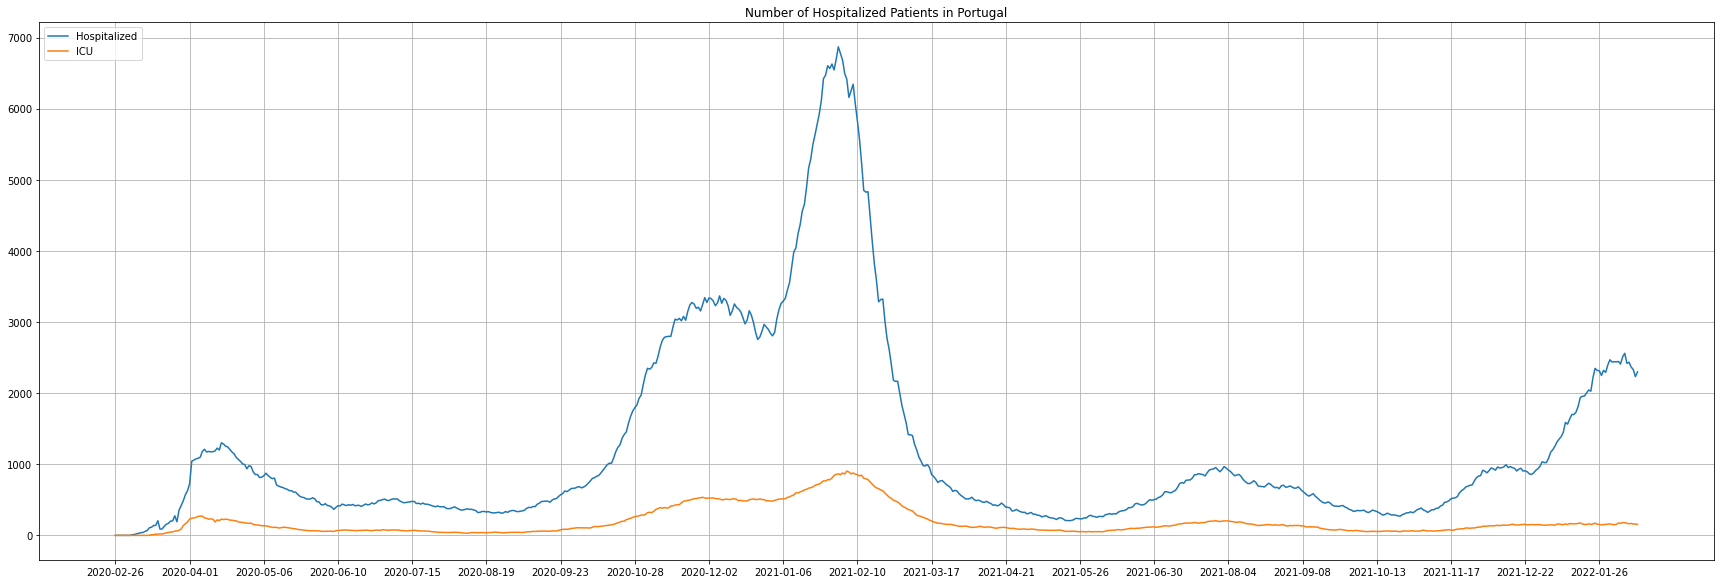

In [28]:
plt.figure(figsize=(24,8))
plt.plot(hosp_pt.date, hosp_pt.value, label='Hospitalized')
plt.plot(hosp_pt.date, hosp_pt.icu, label='ICU')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(range(0, len(hosp_pt.date), 35))
plt.tight_layout()
plt.title('Number of Hospitalized Patients in Portugal')
plt.show()

In [21]:
hosp_pt[['date','value']].loc[hosp_pt.value==hosp_pt.value.max()]

,date,value
341,2021-02-01,6869.0


In [22]:
hosp_pt[['date','icu']].loc[hosp_pt.icu==hosp_pt.icu.max()]

,date,icu
345,2021-02-05,904.0
